In [212]:
import pandas as pd
import numpy as np
#import missingno as mo

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rule
from sklearn.linear_model import LogisticRegression as Logit

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

#plotting
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sn

# permutation
from sklearn.inspection import permutation_importance

## Load the Data

In [213]:
jordan = pd.read_csv("arabbaro/arabbaro_jo_labeled_reduced.csv")

In [214]:
jordan.drop(columns = ["y_dem_top_issue", "y_dem_pref", "y_distrust_army", "y_distrust_pres_prime", "y_trust_ikhwan", "Unnamed: 0"],inplace = True)

In [215]:
kuwait = pd.read_csv("arabbaro/arabbaro_kuw_labeled_reduced.csv")

In [216]:
kuwait.drop(columns = ["y_dem_top_issue", "y_dem_pref", "y_distrust_army", "y_distrust_pres_prime", "y_trust_ikhwan", "Unnamed: 0"], inplace = True)

In [217]:
egypt = pd.read_csv("arabbaro/arabbaro_egy_labeled_reduced.csv")

In [218]:
egypt.drop(columns = ["y_dem_top_issue", "y_dem_pref", "y_distrust_army", "y_distrust_pres_prime", "y_trust_ikhwan", "Unnamed: 0"], inplace = True)

In [219]:
morocco = pd.read_csv("arabbaro/arabbaro_mor_labeled_reduced.csv")

In [220]:
morocco.drop(columns = ["y_dem_top_issue", "y_dem_pref", "y_distrust_army", "y_distrust_pres_prime", "y_trust_ikhwan", "Unnamed: 0"], inplace = True)

In [221]:
algeria = pd.read_csv("arabbaro/arabbaro_alg_labeled_reduced.csv")

In [222]:
algeria.drop(columns = ["y_dem_top_issue", "y_dem_pref", "y_distrust_army", "y_distrust_pres_prime", "y_trust_ikhwan", "Unnamed: 0"],inplace = True)

In [223]:
sudan = pd.read_csv("arabbaro/arabbaro_sud_labeled_reduced.csv")

In [224]:
sudan.drop(columns = ["y_dem_top_issue", "y_dem_pref", "y_distrust_army", "y_distrust_pres_prime", "y_trust_ikhwan", "Unnamed: 0"],inplace = True)

In [225]:
import pandas_profiling
pandas_profiling.ProfileReport(sudan, minimal=True, correlations={"pearson": {"calculate": False}})

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]


## Functions Containing the Model and Related Metrics

In [226]:
def dempref(df):
    # set up SKLearn Framework
    y = df.y_2_dem_pref_not_in_dem
    if 'y_1_distrust_gov' in df.columns:
        X = df.drop(columns = ["y_2_dem_pref_not_in_dem", "y_1_distrust_gov"])
    else:  
        X = df.drop(columns = "y_2_dem_pref_not_in_dem")

    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)

    # Set the folds index to ensure comparable samples
    fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

    # Build the modeling pipeline
    pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

    search_space = [
    
        # NaiveBayes
        {'model': [NB()]},
    
        # KNN with K tuning param
        {'model' : [KNN()],
        'model__n_neighbors':[5,10,25,50]},
    
        # Decision Tree with the Max Depth Param
        {'model': [DT()],
        'model__max_depth':[2,3,4]},
    
        # Random forest with the N Estimators, max depth, and max features tuning param
        {'model' : [RF()],
        'model__max_depth':[6,7,8],
        'model__n_estimators':[500,1000,1500],
        'model__max_features': [5,10,15]},
        
        # logit model
        {'model': [Logit()],
        'model__class_weight':[None, "balanced"]},
    
    ]

    # Grid Search to find the best parameters. The metric used for evaluation is ROC AUC
    search = GridSearchCV(pipe, search_space, 
                         cv = fold_generator,
                         scoring='roc_auc',
                         n_jobs=1)

    # fit the data with the model
    search.fit(train_X,train_y)
    
    best_mod = search.best_estimator_

    return(search.best_score_, search.best_estimator_, search.predict(test_X), m.plot_confusion_matrix(best_mod, test_X, test_y), train_X, test_X, train_y, test_y)

In [227]:
def trustgov(df):
    # set up SKLearn Framework
    y = df.y_1_distrust_gov
    if 'y_2_dem_pref_not_in_dem' in df.columns:
        X = df.drop(columns = ["y_2_dem_pref_not_in_dem", "y_1_distrust_gov"])
    else:  
        X = df.drop(columns = "y_1_distrust_gov")
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)

    # Set the folds index to ensure comparable samples
    fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

    # Build the modeling pipeline
    pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

    search_space = [
    
        # NaiveBayes
        {'model': [NB()]},
    
        # KNN with K tuning param
        {'model' : [KNN()],
        'model__n_neighbors':[5,10,25,50]},
    
        # Decision Tree with the Max Depth Param
        {'model': [DT()],
        'model__max_depth':[2,3,4]},
    
        # Random forest with the N Estimators, max depth, and max features tuning param
        {'model' : [RF()],
        'model__max_depth':[6,7,8],
        'model__n_estimators':[500,1000,1500],
        'model__max_features': [5,10,15]},
        
        # logit model
        {'model': [Logit()],
        'model__class_weight':[None, "balanced"]},
    
    ]

    # Grid Search to find the best parameters. The metric used for evaluation is ROC AUC
    search = GridSearchCV(pipe, search_space, 
                         cv = fold_generator,
                         scoring='roc_auc',
                         n_jobs=1)

    # fit the data with the model
    search.fit(train_X,train_y)
    
    best_mod = search.best_estimator_

    return(search.best_score_, search.best_estimator_, search.predict(test_X), m.plot_confusion_matrix(best_mod, test_X, test_y), train_X, test_X, train_y, test_y)

## Run the Functions on the Data from Each Country

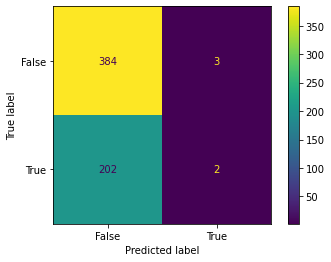

In [228]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = dempref(jordan)

In [229]:
score

0.5734649754944119

In [230]:
clf = RF(max_depth=6, max_features=5, n_estimators=500)

In [231]:
clf.fit(train_X,train_y)

RandomForestClassifier(max_depth=6, max_features=5, n_estimators=500)

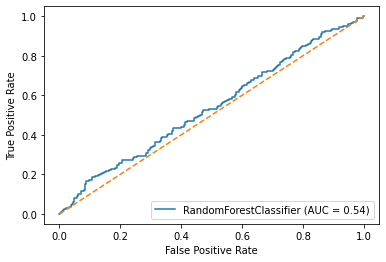

In [232]:
m.plot_roc_curve(clf, test_X, test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.show()

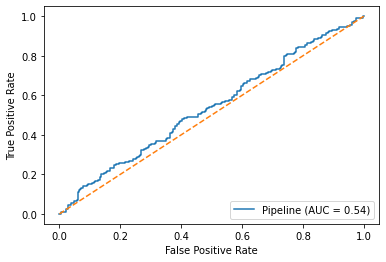

In [233]:
m.plot_roc_curve(best_mod,test_X,test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

In [234]:
fig=plt.figure()
fig.show()

<Figure size 432x288 with 0 Axes>

In [235]:
# Set the the first threshold as 0.8
threshold1 = 0.8

In [236]:
# Set the the first threshold as 0.8
threshold2 = 0.2

In [237]:
# use predict probabilities function
# First predictive threshold: 1 when greater than 80% probability
pred_threshold1 = (best_mod.predict_proba(test_X)[:,1] >= threshold1).astype(int)

In [238]:
confusion_matrix_1 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold1))

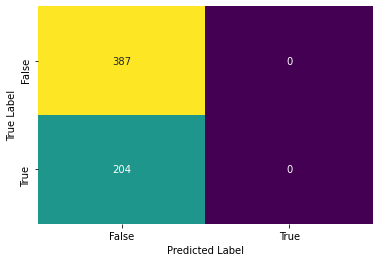

In [239]:
sn.heatmap(confusion_matrix_1, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [240]:
# Second predictive threshold: 0 when greater than 20% probability
pred_threshold2 = (best_mod.predict_proba(test_X)[:,1] >= threshold2).astype(int)

In [241]:
confusion_matrix_2 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold2))

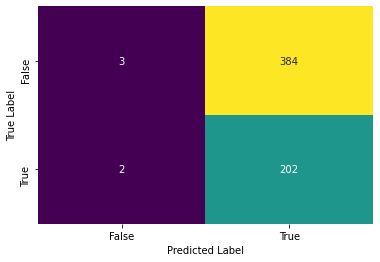

In [242]:
sn.heatmap(confusion_matrix_2, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

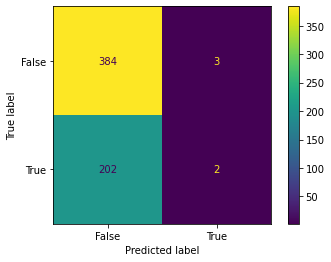

In [243]:
confusion.figure_

In [244]:
# show which model worked best
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=6, max_features=5,
                                        n_estimators=1500))])

In [245]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [246]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

variable        vi       std           low      high
0                        age  0.011964  0.002032  7.900677e-03  0.016027
1                       male  0.006885  0.001307  4.271820e-03  0.009498
2                     income  0.005530  0.000658  4.214232e-03  0.006847
3           internet_use_bin  0.005418  0.001047  3.324240e-03  0.007511
4                      unemp  0.005305  0.000917  3.470872e-03  0.007139
5                  housewife  0.005192  0.001651  1.889675e-03  0.008494
6              user_whatsapp  0.004853  0.000845  3.164037e-03  0.006543
7                neighb_rich  0.004740  0.000765  3.209406e-03  0.006271
8             socmed_use_bin  0.004740  0.000677  3.386005e-03  0.006095
9             user_instagram  0.003950  0.000798  2.354161e-03  0.005547
10                   retired  0.003837  0.000903  2.031603e-03  0.005643
11                      educ  0.003386  0.001236  9.132164e-04  0.005859
12              neighb_mixed  0.003047  0.000917  1.213535e-03  0.004881
13               infs_socmed  0.003047  0.001620 -1.924831e-04  0.006287
14                   protest  0.002483  0.000451  1.580135e-03  0.003386
15                   locvote  0.002257  0.000944  3.687133e-04  0.004146
16           infs_television  0.001919  0.000576  7.677157e-04  0.003070
17  country_of_origin_jordan  0.001919  0.000917  8.486718e-05  0.003753
18             user_snapchat  0.001693  0.000357  9.791698e-04  0.002407
19                   charity  0.001580  0.000422  7.355175e-04  0.002425
20        infs_face2face_tel  0.001354  0.000576  2.033816e-04  0.002505
21           campaign_attend  0.001242  0.001034 -8.273479e-04  0.003310
22                   married  0.001242  0.001205 -1.168641e-03  0.003652
23                  internet  0.001242  0.000749 -2.558125e-04  0.002739
24         employed_priv_sec  0.001242  0.000422  3.969171e-04  0.002086
25                     petit  0.001129  0.000357  4.148357e-04  0.001843
26          employed_pub_sec  0.001016  0.000553 -9.006309e-05  0.002122
27               neighb_poor  0.000677  0.000658 -6.390411e-04  0.001993
28                   selfemp  0.000451  0.000226  5.421011e-20  0.000903
29              user_twitter  0.000339  0.000276 -2.143318e-04  0.000892
30              user_youtube  0.000339  0.000576 -8.124198e-04  0.001490
31                  employed  0.000339  0.000451 -5.643341e-04  0.001242
32                in_capital  0.000226  0.000576 -9.252866e-04  0.001377
33                   student  0.000226  0.000451 -6.772009e-04  0.001129
34                infs_radio  0.000000  0.000000  0.000000e+00  0.000000
35            infs_newspaper  0.000000  0.000000  0.000000e+00  0.000000
36             user_facebook -0.000113  0.000422 -9.574847e-04  0.000732
37             user_telegram -0.000451  0.000226 -9.029345e-04  0.000000
38                    orgmem -0.000451  0.000658 -1.767709e-03  0.000865

In [247]:
vi_dat.to_csv("variable importance csv/jordan_y2")

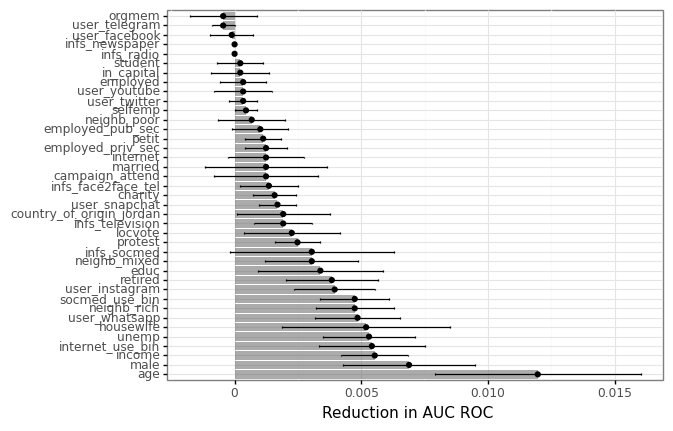

<ggplot: (8775713646873)>

In [248]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

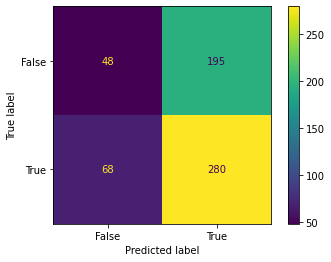

In [249]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = trustgov(jordan)

In [250]:
score

0.6007701570384567

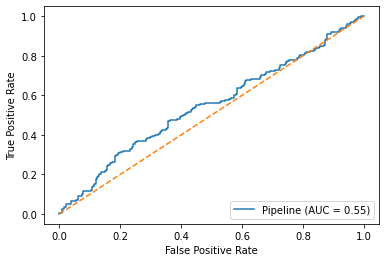

In [251]:
m.plot_roc_curve(best_mod,test_X,test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

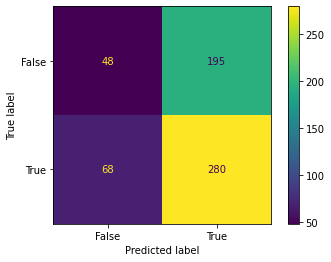

In [252]:
confusion.figure_

In [253]:
pred_threshold1 = (best_mod.predict_proba(test_X)[:,1] >= threshold1).astype(int)

In [254]:
confusion_matrix_1 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold1))

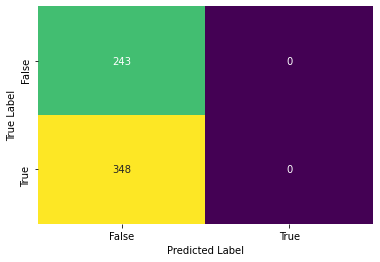

In [255]:
sn.heatmap(confusion_matrix_1, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [256]:
pred_threshold2 = (best_mod.predict_proba(test_X)[:,1] >= threshold2).astype(int)

In [257]:
confusion_matrix_2 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold2))

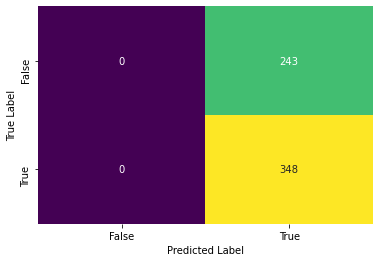

In [258]:
sn.heatmap(confusion_matrix_2, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [259]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=8, max_features=5,
                                        n_estimators=1000))])

In [260]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [261]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

variable        vi       std       low      high
0                        age  0.057336  0.004000  0.049336  0.065336
1                       educ  0.043115  0.003164  0.036787  0.049444
2                     income  0.033070  0.001875  0.029320  0.036820
3                    married  0.024718  0.002704  0.019310  0.030126
4              user_facebook  0.024379  0.004590  0.015199  0.033560
5                       male  0.021896  0.002000  0.017896  0.025896
6                    retired  0.017833  0.002038  0.013757  0.021909
7   country_of_origin_jordan  0.016479  0.001489  0.013501  0.019456
8            campaign_attend  0.015463  0.003083  0.009297  0.021628
9               neighb_mixed  0.014673  0.001472  0.011729  0.017616
10                 housewife  0.014560  0.001401  0.011759  0.017361
11           infs_television  0.014560  0.002842  0.008876  0.020244
12                   charity  0.014221  0.001799  0.010624  0.017819
13            socmed_use_bin  0.014221  0.002559  0.009103  0.019339
14                in_capital  0.013883  0.003837  0.006208  0.021558
15               infs_socmed  0.013318  0.002539  0.008241  0.018396
16               neighb_rich  0.011625  0.002189  0.007248  0.016002
17             user_whatsapp  0.011061  0.001620  0.007821  0.014301
18                   protest  0.010835  0.001968  0.006899  0.014771
19              user_youtube  0.010271  0.001531  0.007209  0.013333
20                   locvote  0.009819  0.001267  0.007286  0.012353
21               neighb_poor  0.009142  0.000226  0.008691  0.009594
22        infs_face2face_tel  0.008691  0.001497  0.005696  0.011685
23                     unemp  0.008465  0.001785  0.004896  0.012034
24                   student  0.008352  0.001401  0.005551  0.011153
25          internet_use_bin  0.007336  0.003172  0.000992  0.013681
26                     petit  0.006208  0.000798  0.004611  0.007804
27                  internet  0.005982  0.001047  0.003889  0.008075
28                  employed  0.005530  0.001094  0.003342  0.007719
29            user_instagram  0.005418  0.001454  0.002509  0.008326
30                   selfemp  0.005305  0.001047  0.003211  0.007398
31                    orgmem  0.005079  0.001287  0.002505  0.007653
32          employed_pub_sec  0.004402  0.000422  0.003557  0.005246
33             user_snapchat  0.003950  0.001236  0.001478  0.006423
34                infs_radio  0.003386  0.000714  0.001958  0.004814
35              user_twitter  0.002935  0.001257  0.000421  0.005448
36         employed_priv_sec  0.002596  0.000845  0.000907  0.004285
37            infs_newspaper  0.000677  0.000422 -0.000167  0.001522
38             user_telegram  0.000451  0.000422 -0.000393  0.001296

In [262]:
vi_dat.to_csv("variable importance csv/jordan_y1")

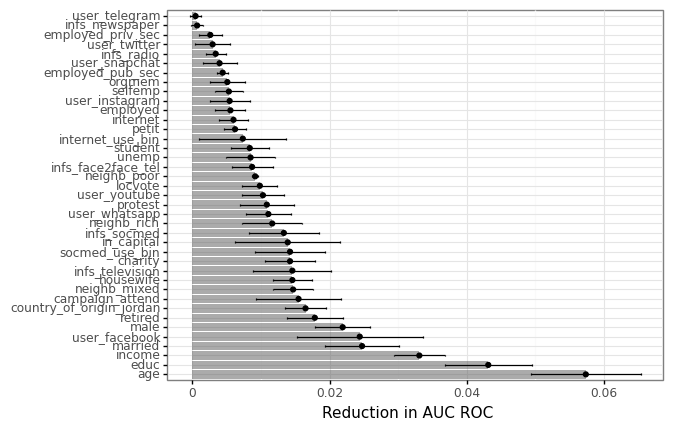

<ggplot: (8775713891819)>

In [263]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

In [264]:
kuwait.isna().sum()

below_medinc             0
above_medinc             0
in_capital               0
married                  0
employed                 0
employed_pub_sec         0
employed_priv_sec        0
selfemp                  0
retired                  0
housewife                0
student                  0
unemp                    0
neighb_rich           1304
neighb_poor           1304
neighb_mixed          1304
educ                     0
male                     0
age                      0
orgmem                   0
charity                  0
campaign_attend          0
locvote                  0
internet                 0
internet_use_bin         0
socmed_use_bin           0
infs_face2face_tel       0
infs_newspaper           0
infs_radio               0
infs_television          0
infs_socmed              0
user_facebook            0
user_twitter             0
user_instagram           0
user_youtube             0
user_whatsapp            0
user_telegram            0
user_snapchat            0
y

In [265]:
kuwait.drop(columns = ["neighb_rich", "neighb_poor", "neighb_mixed"], inplace = True)

In [266]:
kuwait

below_medinc  above_medinc  in_capital  married  employed  \
0            False         False       False     True      True   
1            False          True       False     True      True   
2            False         False       False     True     False   
3             True         False       False     True     False   
4             True         False       False     True      True   
...            ...           ...         ...      ...       ...   
1299         False         False       False    False     False   
1300         False          True       False     True      True   
1301         False         False       False     True      True   
1302         False         False       False    False     False   
1303         False         False       False     True      True   

      employed_pub_sec  employed_priv_sec  selfemp  retired  housewife  ...  \
0                 True              False    False    False      False  ...   
1                 True              False    False    False      False  ...   
2                False              False    False     True      False  ...   
3                False              False    False     True      False  ...   
4                 True              False    False    False      False  ...   
...                ...                ...      ...      ...        ...  ...   
1299             False              False    False    False      False  ...   
1300             False               True    False    False      False  ...   
1301             False               True    False    False      False  ...   
1302             False              False    False    False      False  ...   
1303              True              False    False    False      False  ...   

      infs_television  infs_socmed  user_facebook  user_twitter  \
0               False         True              1             1   
1               False         True              0             1   
2               False         True              0             1   
3               False         True              0             1   
4               False         True              1             1   
...               ...          ...            ...           ...   
1299            False         True              1             1   
1300            False         True              0             1   
1301            False         True              1             1   
1302            False         True              1             1   
1303            False         True              0             1   

      user_instagram  user_youtube  user_whatsapp  user_telegram  \
0                  1             1              1              1   
1                  1             1              1              0   
2                  1             1              1              0   
3                  1             1              1              0   
4                  1             1              1              1   
...              ...           ...            ...            ...   
1299               1             1              1              0   
1300               1             1              1              1   
1301               1             1              1              0   
1302               1             1              1              1   
1303               1             1              1              1   

      user_snapchat  y_1_distrust_gov  
0                 1              True  
1                 0             False  
2                 0              True  
3                 0              True  
4                 0              True  
...             ...               ...  
1299              1             False  
1300              1             False  
1301              1             False  
1302              1             False  
1303              1              True  

[1304 rows x 35 columns]

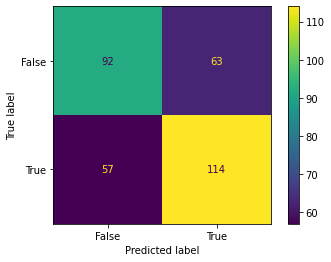

In [267]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = trustgov(kuwait)

In [268]:
score

0.6640290346624192

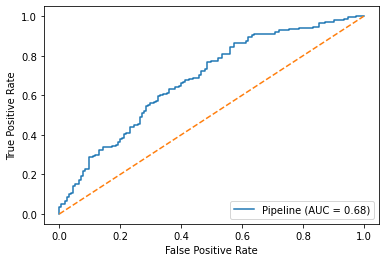

In [269]:
m.plot_roc_curve(best_mod,test_X,test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

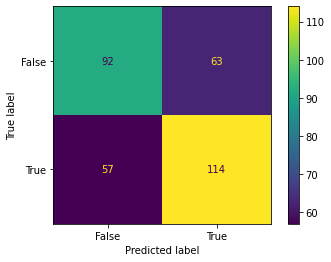

In [270]:
confusion.figure_

In [271]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=6, max_features=5,
                                        n_estimators=1000))])

In [272]:
pred_threshold1 = (best_mod.predict_proba(test_X)[:,1] >= threshold1).astype(int)

In [273]:
confusion_matrix_1 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold1))

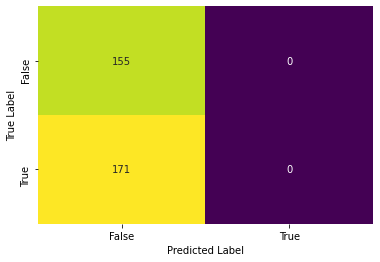

In [274]:
sn.heatmap(confusion_matrix_1, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [275]:
pred_threshold2 = (best_mod.predict_proba(test_X)[:,1] >= threshold2).astype(int)

In [276]:
confusion_matrix_2 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold2))

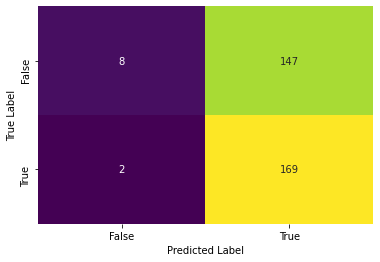

In [277]:
sn.heatmap(confusion_matrix_2, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [278]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [279]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

variable        vi       std       low      high
0                  age  0.044376  0.007749  0.028877  0.059875
1          infs_socmed  0.036605  0.009795  0.017016  0.056195
2         user_twitter  0.020041  0.006323  0.007395  0.032687
3       user_instagram  0.018609  0.004211  0.010188  0.027031
4         above_medinc  0.017382  0.002666  0.012050  0.022715
5              retired  0.017178  0.001192  0.014793  0.019563
6                 male  0.016769  0.003207  0.010354  0.023184
7         user_youtube  0.016155  0.005941  0.004273  0.028037
8        user_whatsapp  0.013292  0.001584  0.010124  0.016461
9              charity  0.013088  0.005149  0.002790  0.023386
10              orgmem  0.011247  0.001940  0.007367  0.015128
11                educ  0.010838  0.004121  0.002597  0.019080
12          in_capital  0.010020  0.002277  0.005466  0.014575
13       user_facebook  0.009816  0.002554  0.004708  0.014924
14           housewife  0.009407  0.003624  0.002159  0.016654
15             married  0.009202  0.002666  0.003870  0.014535
16             locvote  0.008998  0.004211  0.000576  0.017420
17             student  0.006953  0.002921  0.001111  0.012795
18    employed_pub_sec  0.006953  0.000765  0.005423  0.008483
19      socmed_use_bin  0.006953  0.002848  0.001256  0.012650
20       user_snapchat  0.005930  0.001759  0.002412  0.009449
21     campaign_attend  0.005726  0.002385  0.000956  0.010496
22        below_medinc  0.005521  0.001530  0.002461  0.008582
23     infs_television  0.005521  0.002935 -0.000349  0.011392
24    internet_use_bin  0.005317  0.002085  0.001146  0.009488
25       user_telegram  0.004908  0.001192  0.002523  0.007293
26   employed_priv_sec  0.003272  0.000765  0.001742  0.004802
27  infs_face2face_tel  0.002863  0.001759 -0.000655  0.006381
28             selfemp  0.002863  0.000409  0.002045  0.003681
29               unemp  0.002454  0.000501  0.001452  0.003456
30            employed  0.001227  0.002774 -0.004321  0.006775
31            internet  0.000613  0.001043 -0.001472  0.002699
32      infs_newspaper  0.000204  0.001636 -0.003067  0.003476
33          infs_radio  0.000000  0.000647 -0.001293  0.001293

In [280]:
vi_dat.to_csv("variable importance csv/kuwait_y1")

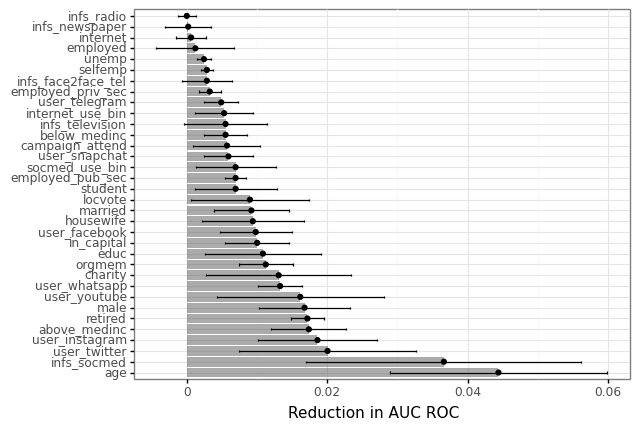

<ggplot: (8775714067836)>

In [281]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

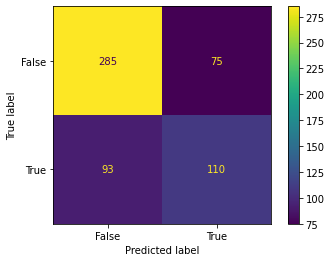

In [282]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = dempref(morocco)

In [283]:
score

0.7282930202536375

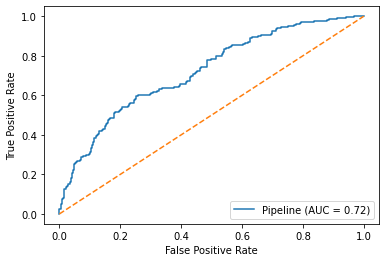

In [284]:
m.plot_roc_curve(best_mod,test_X,test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

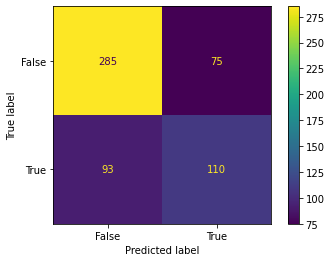

In [285]:
confusion.figure_

In [286]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=6, max_features=10,
                                        n_estimators=1500))])

In [287]:
pred_threshold1 = (best_mod.predict_proba(test_X)[:,1] >= threshold1).astype(int)

In [288]:
confusion_matrix_1 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold1))

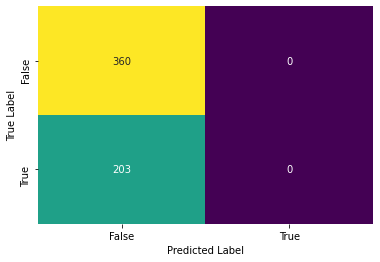

In [289]:
sn.heatmap(confusion_matrix_1, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [290]:
pred_threshold2 = (best_mod.predict_proba(test_X)[:,1] >= threshold2).astype(int)

In [291]:
confusion_matrix_2 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold2))

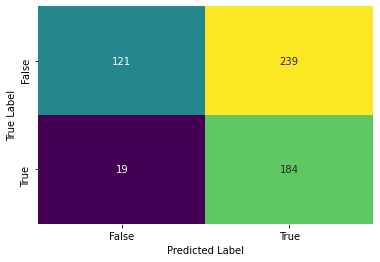

In [292]:
sn.heatmap(confusion_matrix_2, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [293]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [294]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

variable        vi       std           low      high
0        user_facebook  0.062396  0.007636  4.712363e-02  0.077669
1                 educ  0.048161  0.004030  4.010188e-02  0.056221
2                  age  0.031198  0.005027  2.114372e-02  0.041252
3                 male  0.017438  0.004813  7.812355e-03  0.027063
4     internet_use_bin  0.010083  0.002372  5.338078e-03  0.014828
5       socmed_use_bin  0.009846  0.002615  4.615562e-03  0.015076
6              protest  0.009253  0.002207  4.839603e-03  0.013666
7         user_youtube  0.009253  0.003590  2.072244e-03  0.016433
8               orgmem  0.008897  0.001759  5.377842e-03  0.012416
9                petit  0.008660  0.001100  6.459402e-03  0.010860
10             married  0.005694  0.001221  3.251333e-03  0.008137
11         infs_socmed  0.005457  0.003527 -1.597186e-03  0.012511
12       user_telegram  0.005219  0.001267  2.686340e-03  0.007753
13    employed_pub_sec  0.005219  0.000581  4.057182e-03  0.006382
14      infs_newspaper  0.004864  0.000692  3.480201e-03  0.006247
15            internet  0.004626  0.002792 -9.578184e-04  0.010210
16           housewife  0.004508  0.003152 -1.796123e-03  0.010812
17             student  0.003915  0.000964  1.987180e-03  0.005842
18          in_capital  0.003677  0.000444  2.789642e-03  0.004565
19       user_whatsapp  0.003440  0.001891 -3.410148e-04  0.007221
20             locvote  0.003321  0.000805  1.712377e-03  0.004931
21         neighb_poor  0.003203  0.004480 -5.756208e-03  0.012162
22            employed  0.002966  0.000992  9.806405e-04  0.004951
23        user_twitter  0.002491  0.000444  1.603403e-03  0.003379
24  infs_face2face_tel  0.002372  0.000750  8.719916e-04  0.003873
25          infs_radio  0.002017  0.000888  2.412065e-04  0.003792
26   employed_priv_sec  0.001542  0.000805 -6.698220e-05  0.003151
27     campaign_attend  0.001542  0.000605  3.323797e-04  0.002752
28             selfemp  0.001068  0.001150 -1.232588e-03  0.003368
29        neighb_mixed  0.000949  0.001935 -2.920405e-03  0.004818
30      user_instagram  0.000949  0.000474 -5.551115e-17  0.001898
31         neighb_rich  0.000830  0.000605 -3.793641e-04  0.002040
32       user_snapchat  0.000474  0.000581 -6.877769e-04  0.001637
33     infs_television  0.000237  0.002668 -5.099512e-03  0.005574
34             retired  0.000119  0.000237 -3.558719e-04  0.000593
35             charity -0.000237  0.001433 -3.103925e-03  0.002629
36               unemp -0.000474  0.001472 -3.418665e-03  0.002470

In [295]:
vi_dat.to_csv("variable importance csv/morocco_y2")

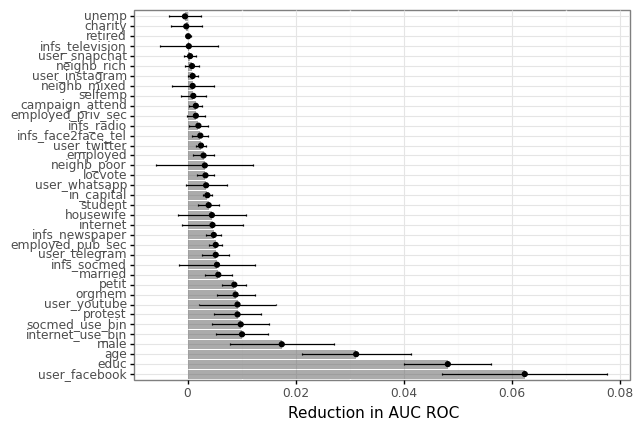

<ggplot: (8775727941051)>

In [296]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

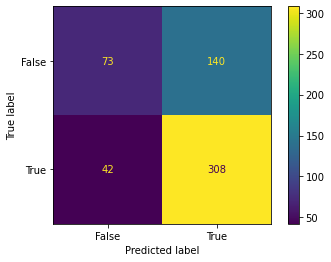

In [297]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = trustgov(morocco)

In [298]:
score

0.747838513251352

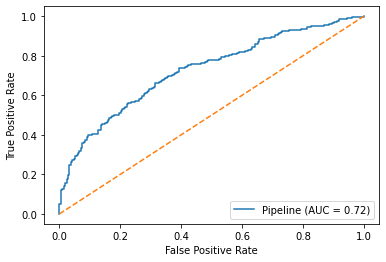

In [299]:
m.plot_roc_curve(best_mod,test_X,test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

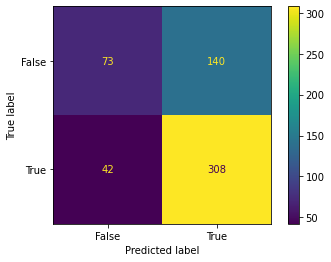

In [300]:
confusion.figure_

In [301]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=8, max_features=5,
                                        n_estimators=1500))])

In [302]:
pred_threshold1 = (best_mod.predict_proba(test_X)[:,1] >= threshold1).astype(int)

In [303]:
confusion_matrix_1 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold1))

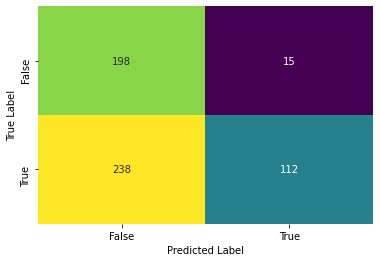

In [304]:
sn.heatmap(confusion_matrix_1, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [305]:
pred_threshold2 = (best_mod.predict_proba(test_X)[:,1] >= threshold2).astype(int)

In [306]:
confusion_matrix_2 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold2))

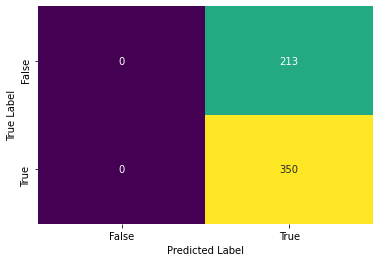

In [307]:
sn.heatmap(confusion_matrix_2, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [308]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [309]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

variable        vi       std       low      high
0                  age  0.079953  0.004600  0.070752  0.089153
1              locvote  0.053144  0.005431  0.042282  0.064005
2                 educ  0.027521  0.001332  0.024858  0.030184
3              protest  0.025267  0.004336  0.016595  0.033939
4      infs_television  0.024555  0.003511  0.017533  0.031577
5      campaign_attend  0.020403  0.001618  0.017168  0.023639
6              married  0.017438  0.001743  0.013951  0.020925
7     internet_use_bin  0.015302  0.002637  0.010029  0.020576
8        user_facebook  0.015302  0.003034  0.009235  0.021370
9              charity  0.012811  0.002006  0.008799  0.016824
10                male  0.011862  0.003205  0.005452  0.018272
11         neighb_poor  0.011862  0.001949  0.007964  0.015761
12         infs_socmed  0.011744  0.001565  0.008614  0.014873
13               petit  0.011625  0.002361  0.006904  0.016346
14       user_whatsapp  0.010913  0.001935  0.007044  0.014783
15              orgmem  0.010676  0.001547  0.007583  0.013769
16        neighb_mixed  0.010320  0.002207  0.005907  0.014733
17      socmed_use_bin  0.010202  0.001423  0.007355  0.013049
18           housewife  0.007948  0.001861  0.004227  0.011669
19            employed  0.007355  0.000605  0.006145  0.008564
20        user_youtube  0.006999  0.000872  0.005255  0.008742
21            internet  0.006880  0.001618  0.003645  0.010116
22               unemp  0.006762  0.001783  0.003195  0.010328
23  infs_face2face_tel  0.006643  0.001472  0.003699  0.009587
24          infs_radio  0.006287  0.000712  0.004864  0.007711
25        user_twitter  0.005694  0.001332  0.003031  0.008357
26          in_capital  0.005575  0.001861  0.001854  0.009296
27             selfemp  0.005457  0.000949  0.003559  0.007355
28   employed_priv_sec  0.004626  0.000692  0.003243  0.006010
29             retired  0.004508  0.000291  0.003927  0.005089
30      user_instagram  0.004508  0.000964  0.002580  0.006435
31         neighb_rich  0.003915  0.000605  0.002705  0.005124
32       user_snapchat  0.003796  0.001783  0.000229  0.007363
33      infs_newspaper  0.003559  0.000750  0.002058  0.005059
34             student  0.002135  0.001100 -0.000065  0.004335
35    employed_pub_sec  0.002135  0.000291  0.001554  0.002716
36       user_telegram -0.000237  0.000474 -0.001186  0.000712

In [310]:
vi_dat.to_csv("variable importance csv/morocco_y1")

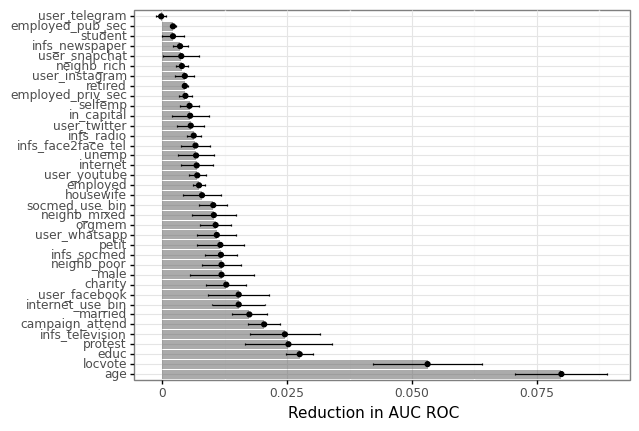

<ggplot: (8775714123340)>

In [311]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

In [312]:
egypt.drop(columns = "locvote", inplace = True)

In [313]:
egypt.dropna(inplace = True)

In [314]:
egypt.isna().sum()

income                     0
in_capital                 0
married                    0
employed                   0
employed_pub_sec           0
employed_priv_sec          0
selfemp                    0
retired                    0
housewife                  0
student                    0
unemp                      0
neighb_rich                0
neighb_poor                0
neighb_mixed               0
educ                       0
male                       0
age                        0
orgmem                     0
charity                    0
petit                      0
protest                    0
campaign_attend            0
internet                   0
internet_use_bin           0
socmed_use_bin             0
infs_face2face_tel         0
infs_newspaper             0
infs_radio                 0
infs_television            0
infs_socmed                0
user_facebook              0
user_twitter               0
user_instagram             0
user_youtube               0
user_whatsapp 

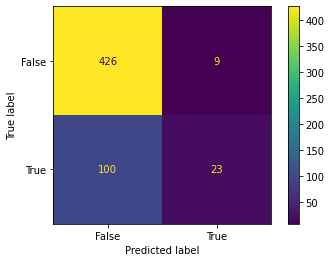

In [315]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = dempref(egypt)

In [316]:
score

0.7532065314566584

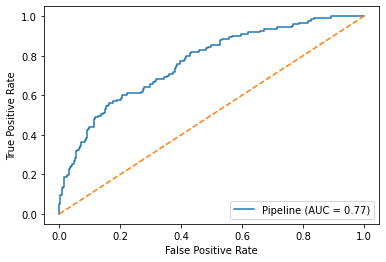

In [317]:
m.plot_roc_curve(best_mod,test_X,test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

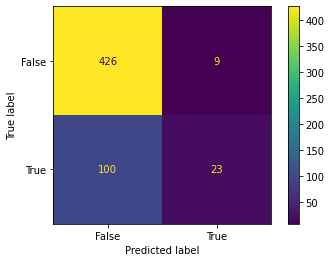

In [318]:
confusion.figure_

In [319]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=7, max_features=10,
                                        n_estimators=1000))])

In [320]:
pred_threshold1 = (best_mod.predict_proba(test_X)[:,1] >= threshold1).astype(int)

In [321]:
confusion_matrix_1 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold1))

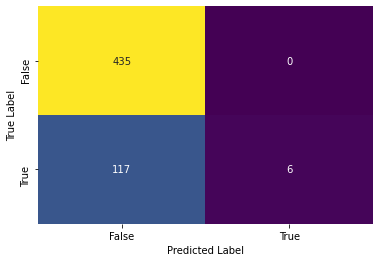

In [322]:
sn.heatmap(confusion_matrix_1, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [323]:
pred_threshold2 = (best_mod.predict_proba(test_X)[:,1] >= threshold2).astype(int)

In [324]:
confusion_matrix_2 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold2))

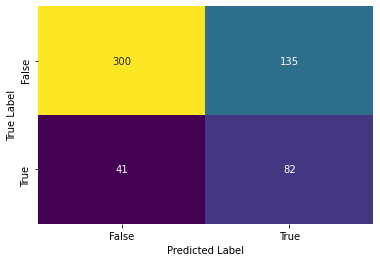

In [325]:
sn.heatmap(confusion_matrix_2, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [326]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [327]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

variable        vi       std           low      high
0          infs_socmed  0.029767  0.002763  2.424186e-02  0.035292
1              protest  0.024387  0.000878  2.263037e-02  0.026144
2     internet_use_bin  0.021877  0.000717  2.044232e-02  0.023311
3                 educ  0.008368  0.001069  6.229702e-03  0.010507
4      campaign_attend  0.008010  0.000610  6.790432e-03  0.009229
5                petit  0.006814  0.000971  4.871718e-03  0.008756
6               income  0.006695  0.002152  2.390915e-03  0.010998
7                  age  0.005499  0.002490  5.181909e-04  0.010480
8               orgmem  0.004184  0.000845  2.493469e-03  0.005875
9        user_whatsapp  0.002989  0.001134  7.204225e-04  0.005257
10            internet  0.002989  0.000655  1.679085e-03  0.004298
11        user_twitter  0.002750  0.000478  1.793186e-03  0.003706
12            employed  0.002510  0.000793  9.245070e-04  0.004096
13      socmed_use_bin  0.002510  0.001219  7.219629e-05  0.004949
14        user_youtube  0.002271  0.001384 -4.963149e-04  0.005039
15     infs_television  0.002032  0.000478  1.075912e-03  0.002989
16       user_facebook  0.001913  0.001331 -7.496781e-04  0.004575
17    employed_pub_sec  0.001793  0.000378  1.037112e-03  0.002549
18                male  0.001793  0.000378  1.037112e-03  0.002549
19             student  0.001435  0.000478  4.781829e-04  0.002391
20             married  0.001195  0.000535  1.262078e-04  0.002265
21       user_telegram  0.001076  0.000447  1.813132e-04  0.001971
22       user_snapchat  0.001076  0.000239  5.977286e-04  0.001554
23   employed_priv_sec  0.001076  0.000239  5.977286e-04  0.001554
24             charity  0.000956  0.000293  3.707137e-04  0.001542
25      infs_newspaper  0.000598  0.000000  5.977286e-04  0.000598
26               unemp  0.000598  0.000535 -4.715208e-04  0.001667
27  infs_face2face_tel  0.000478  0.000878 -1.278773e-03  0.002235
28           housewife  0.000478  0.000586 -6.931212e-04  0.001649
29          in_capital  0.000478  0.000239 -5.421011e-20  0.000956
30         neighb_rich  0.000478  0.000239 -5.421011e-20  0.000956
31             selfemp  0.000359  0.000478 -5.977286e-04  0.001315
32        neighb_mixed  0.000239  0.000610 -9.800405e-04  0.001458
33      user_instagram  0.000120  0.000239 -3.586372e-04  0.000598
34          infs_radio  0.000000  0.000000  0.000000e+00  0.000000
35             retired  0.000000  0.000000  0.000000e+00  0.000000
36         neighb_poor -0.000120  0.000239 -5.977286e-04  0.000359

In [328]:
vi_dat.to_csv("variable importance csv/egypt_y2")

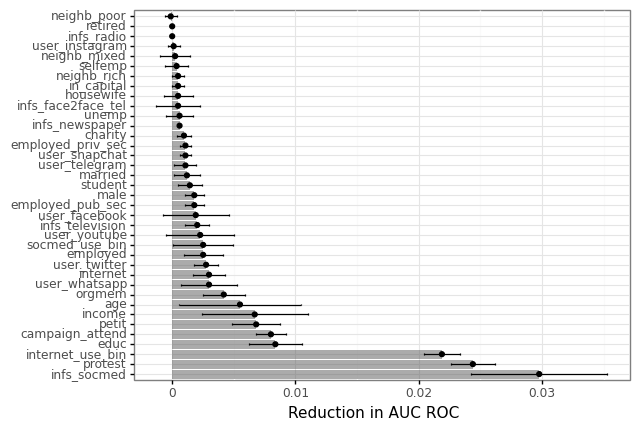

<ggplot: (8775710631560)>

In [329]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

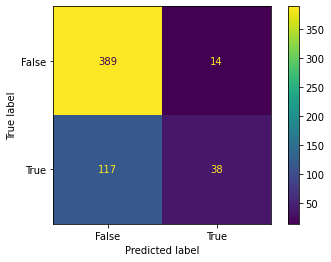

In [330]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = trustgov(egypt)

In [331]:
score

0.7371624079203576

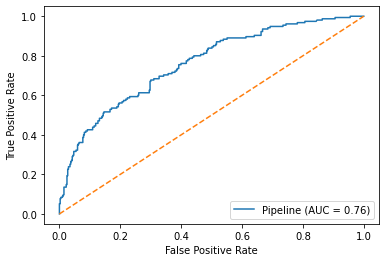

In [332]:
m.plot_roc_curve(best_mod,test_X,test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

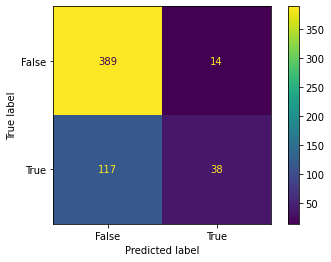

In [333]:
confusion.figure_

In [334]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=8, max_features=10,
                                        n_estimators=1000))])

In [335]:
pred_threshold1 = (best_mod.predict_proba(test_X)[:,1] >= threshold1).astype(int)

In [336]:
confusion_matrix_1 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold1))

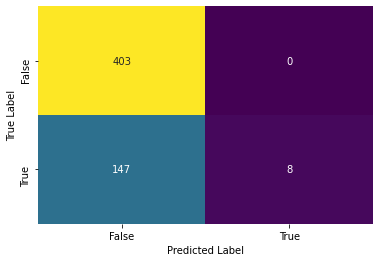

In [337]:
sn.heatmap(confusion_matrix_1, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [338]:
pred_threshold2 = (best_mod.predict_proba(test_X)[:,1] >= threshold2).astype(int)

In [339]:
confusion_matrix_2 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold2))

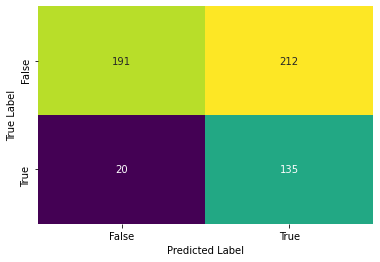

In [340]:
sn.heatmap(confusion_matrix_2, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [341]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [342]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

variable        vi       std       low      high
0                  age  0.043873  0.003903  0.036067  0.051680
1              protest  0.037896  0.001913  0.034071  0.041721
2          infs_socmed  0.032158  0.001331  0.029495  0.034820
3               income  0.027735  0.002191  0.023352  0.032117
4      infs_television  0.027735  0.001716  0.024303  0.031166
5              charity  0.025941  0.003309  0.019324  0.032559
6                unemp  0.023670  0.001171  0.021327  0.026013
7         user_twitter  0.021996  0.002118  0.017760  0.026233
8     internet_use_bin  0.018530  0.002700  0.013130  0.023929
9         user_youtube  0.014106  0.001986  0.010134  0.018078
10     campaign_attend  0.011476  0.000956  0.009564  0.013389
11                educ  0.008727  0.001042  0.006642  0.010811
12            employed  0.008607  0.000293  0.008022  0.009193
13                male  0.007412  0.001444  0.004523  0.010301
14              orgmem  0.007173  0.001134  0.004905  0.009441
15  infs_face2face_tel  0.005977  0.000845  0.004287  0.007668
16               petit  0.005738  0.001042  0.003654  0.007823
17       user_telegram  0.005738  0.000478  0.004782  0.006695
18    employed_pub_sec  0.005260  0.000697  0.003866  0.006654
19             selfemp  0.005260  0.001219  0.002822  0.007698
20       user_snapchat  0.004662  0.000586  0.003491  0.005834
21            internet  0.004304  0.001028  0.002247  0.006360
22      user_instagram  0.004065  0.000956  0.002152  0.005977
23   employed_priv_sec  0.003945  0.000478  0.002989  0.004901
24          in_capital  0.003825  0.000478  0.002869  0.004782
25             married  0.003706  0.001159  0.001388  0.006024
26       user_facebook  0.003108  0.001622 -0.000135  0.006351
27      socmed_use_bin  0.002750  0.000811  0.001128  0.004371
28       user_whatsapp  0.002510  0.001159  0.000192  0.004829
29        neighb_mixed  0.002152  0.000717  0.000717  0.003586
30      infs_newspaper  0.001554  0.000478  0.000598  0.002510
31         neighb_poor  0.001435  0.000293  0.000849  0.002020
32           housewife  0.001195  0.000756 -0.000317  0.002708
33         neighb_rich  0.000717  0.000239  0.000239  0.001195
34             student  0.000478  0.000447 -0.000416  0.001373
35             retired  0.000239  0.000293 -0.000347  0.000825
36          infs_radio  0.000000  0.000000  0.000000  0.000000

In [343]:
vi_dat.to_csv("variable importance csv/egypt_y1")

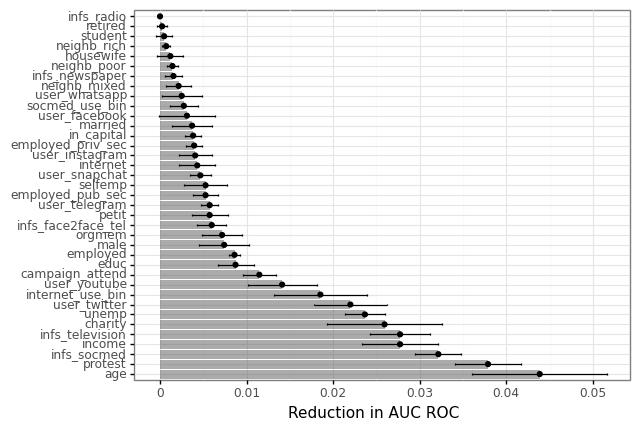

<ggplot: (8775727966570)>

In [344]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

In [345]:
algeria.dropna(inplace = True)

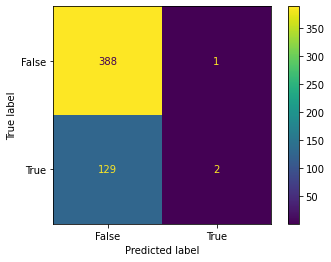

In [346]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = dempref(algeria)

In [347]:
score

0.6281312669310329

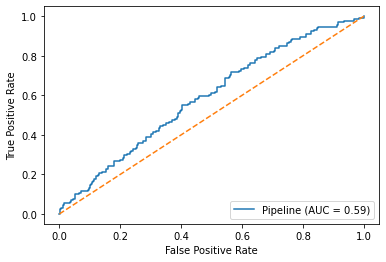

In [348]:
m.plot_roc_curve(best_mod,test_X,test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

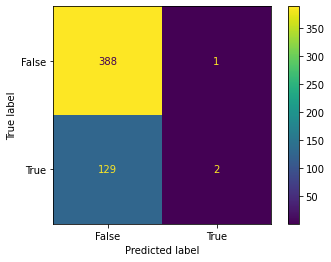

In [349]:
confusion.figure_

In [350]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=6, max_features=10,
                                        n_estimators=500))])

In [351]:
pred_threshold1 = (best_mod.predict_proba(test_X)[:,1] >= threshold1).astype(int)

In [352]:
confusion_matrix_1 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold1))

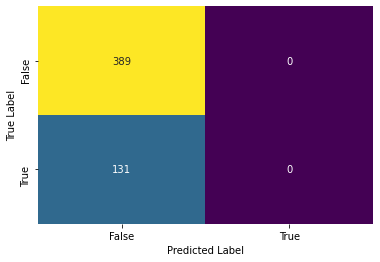

In [353]:
sn.heatmap(confusion_matrix_1, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [354]:
pred_threshold2 = (best_mod.predict_proba(test_X)[:,1] >= threshold2).astype(int)

In [355]:
confusion_matrix_2 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold2))

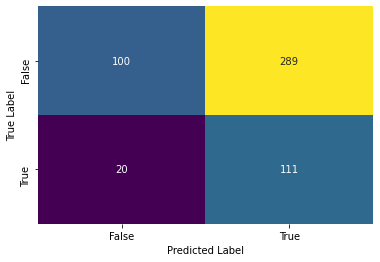

In [356]:
sn.heatmap(confusion_matrix_2, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [357]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [358]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

variable        vi       std       low      high
0                 educ  0.009634  0.001465  0.006705  0.012563
1                  age  0.008606  0.001798  0.005010  0.012203
2      campaign_attend  0.007065  0.001149  0.004767  0.009363
3     internet_use_bin  0.004239  0.001498  0.001243  0.007235
4         neighb_mixed  0.004239  0.001191  0.001856  0.006621
5              charity  0.003854  0.000812  0.002229  0.005478
6       user_instagram  0.003854  0.000406  0.003041  0.004666
7          neighb_poor  0.003597  0.001044  0.001510  0.005684
8       infs_newspaper  0.003468  0.000514  0.002441  0.004496
9             employed  0.002954  0.000315  0.002325  0.003584
10              orgmem  0.002697  0.001245  0.000207  0.005188
11          in_capital  0.002312  0.000871  0.000570  0.004055
12       user_facebook  0.002184  0.000514  0.001156  0.003211
13             married  0.002184  0.000655  0.000874  0.003494
14             protest  0.002184  0.000514  0.001156  0.003211
15        user_twitter  0.002055  0.000481  0.001094  0.003016
16             selfemp  0.001927  0.000406  0.001114  0.002739
17                male  0.001927  0.000704  0.000520  0.003334
18          infs_radio  0.001798  0.000257  0.001285  0.002312
19    employed_pub_sec  0.001798  0.000481  0.000837  0.002760
20  infs_face2face_tel  0.001541  0.000655  0.000231  0.002851
21             locvote  0.001413  0.000629  0.000154  0.002672
22      socmed_use_bin  0.001285  0.001520 -0.001755  0.004324
23     infs_television  0.001285  0.000812 -0.000340  0.002909
24         infs_socmed  0.001285  0.000406  0.000472  0.002097
25   employed_priv_sec  0.001028  0.000771 -0.000514  0.002569
26               petit  0.000899  0.000655 -0.000411  0.002209
27             retired  0.000899  0.000514 -0.000128  0.001927
28        user_youtube  0.000771  0.000749 -0.000727  0.002269
29       user_snapchat  0.000642  0.000000  0.000642  0.000642
30           housewife  0.000514  0.000481 -0.000447  0.001475
31         neighb_rich  0.000128  0.000257 -0.000385  0.000642
32               unemp  0.000128  0.000257 -0.000385  0.000642
33            internet  0.000128  0.000749 -0.001370  0.001626
34       user_telegram  0.000000  0.000000  0.000000  0.000000
35             student -0.000128  0.000257 -0.000642  0.000385
36       user_whatsapp -0.000128  0.000257 -0.000642  0.000385

In [359]:
vi_dat.to_csv("variable importance csv/algeria_y2")

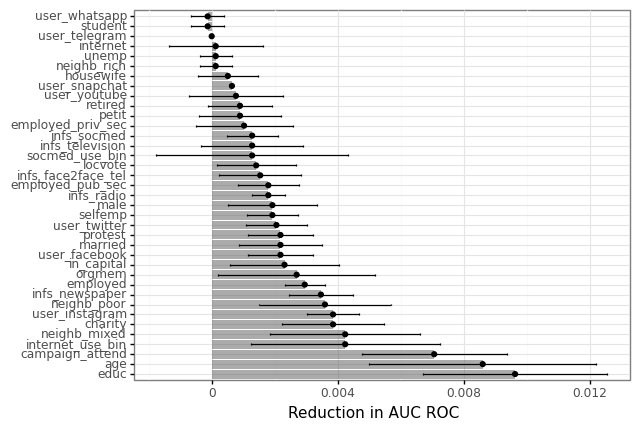

<ggplot: (8775695808413)>

In [360]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

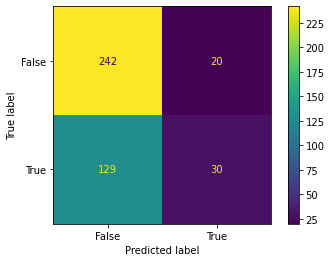

In [361]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = dempref(sudan)

In [362]:
score

0.6457884163933721

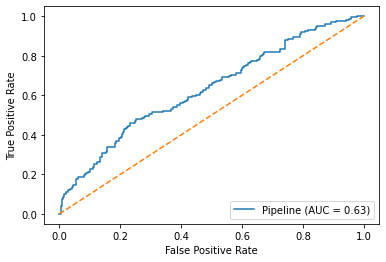

In [363]:
m.plot_roc_curve(best_mod,test_X,test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

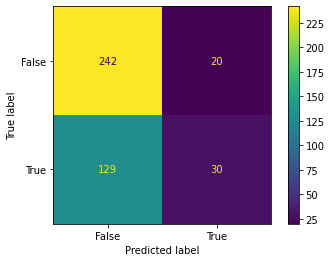

In [364]:
confusion.figure_

In [365]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=8, max_features=5,
                                        n_estimators=1500))])

In [366]:
pred_threshold1 = (best_mod.predict_proba(test_X)[:,1] >= threshold1).astype(int)

In [367]:
confusion_matrix_1 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold1))

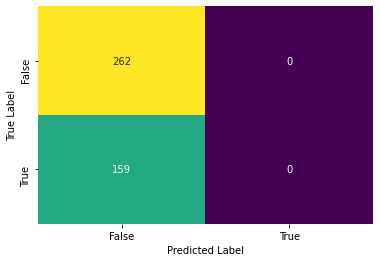

In [368]:
sn.heatmap(confusion_matrix_1, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [369]:
pred_threshold2 = (best_mod.predict_proba(test_X)[:,1] >= threshold2).astype(int)

In [370]:
confusion_matrix_2 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold2))

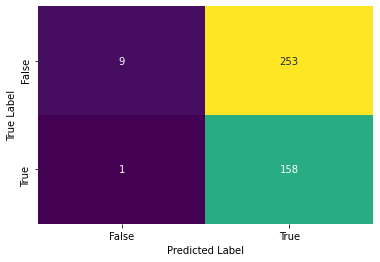

In [371]:
sn.heatmap(confusion_matrix_2, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [372]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [373]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

variable        vi       std       low      high
0               income  0.062866  0.002484  0.057899  0.067834
1                 educ  0.047981  0.004819  0.038344  0.057618
2                  age  0.044181  0.005285  0.033610  0.054751
3     internet_use_bin  0.038321  0.003833  0.030655  0.045988
4              charity  0.035471  0.001965  0.031541  0.039401
5               orgmem  0.028029  0.001469  0.025091  0.030966
6       socmed_use_bin  0.025970  0.004518  0.016934  0.035006
7         neighb_mixed  0.025495  0.003103  0.019289  0.031701
8                petit  0.022803  0.003103  0.016597  0.029009
9         user_youtube  0.021853  0.003191  0.015471  0.028234
10       user_whatsapp  0.021536  0.001050  0.019435  0.023637
11     infs_television  0.018686  0.002160  0.014366  0.023005
12             locvote  0.017260  0.002422  0.012416  0.022105
13             protest  0.016785  0.002148  0.012489  0.021081
14                male  0.016310  0.002770  0.010770  0.021850
15       user_facebook  0.015202  0.002806  0.009590  0.020814
16         neighb_poor  0.013777  0.001778  0.010222  0.017332
17             married  0.013460  0.001584  0.010293  0.016627
18           housewife  0.012827  0.000923  0.010980  0.014673
19        user_twitter  0.012352  0.001847  0.008658  0.016045
20          in_capital  0.012193  0.003029  0.006134  0.018252
21     campaign_attend  0.012035  0.001362  0.009310  0.014759
22             student  0.009818  0.001469  0.006881  0.012755
23            internet  0.009343  0.001535  0.006272  0.012413
24  infs_face2face_tel  0.008709  0.002295  0.004120  0.013299
25               unemp  0.008551  0.000923  0.006704  0.010398
26         neighb_rich  0.008551  0.002474  0.003604  0.013498
27            employed  0.008551  0.001362  0.005827  0.011275
28             selfemp  0.008234  0.001630  0.004974  0.011495
29         infs_socmed  0.007918  0.002402  0.003115  0.012721
30          infs_radio  0.006017  0.001185  0.003647  0.008387
31      infs_newspaper  0.005542  0.001735  0.002073  0.009012
32    employed_pub_sec  0.005384  0.000923  0.003537  0.007231
33   employed_priv_sec  0.005384  0.000593  0.004199  0.006569
34      user_instagram  0.004434  0.001074  0.002286  0.006582
35             retired  0.004117  0.000317  0.003484  0.004751
36       user_snapchat  0.002059  0.000388  0.001283  0.002834
37       user_telegram  0.001267  0.000388  0.000491  0.002043

In [374]:
vi_dat.to_csv("variable importance csv/sudan_y2")

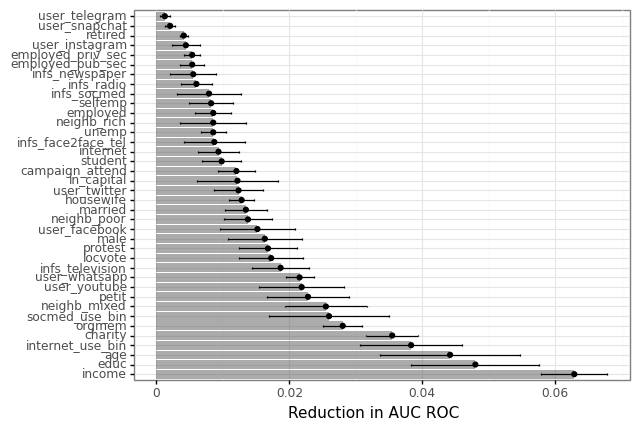

<ggplot: (8775695732327)>

In [375]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

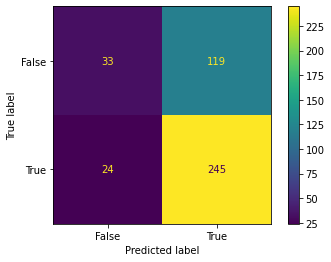

In [376]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = trustgov(sudan)

In [377]:
score

0.6166515737084123

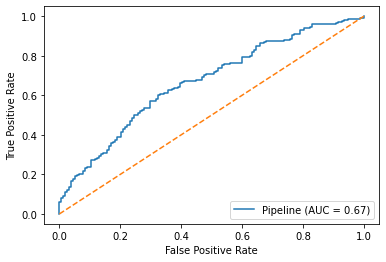

In [378]:
m.plot_roc_curve(best_mod,test_X,test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

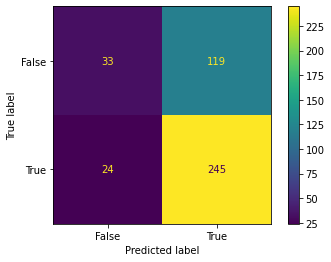

In [379]:
confusion.figure_

In [380]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=8, max_features=15,
                                        n_estimators=1500))])

In [381]:
pred_threshold1 = (best_mod.predict_proba(test_X)[:,1] >= threshold1).astype(int)

In [382]:
confusion_matrix_1 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold1))

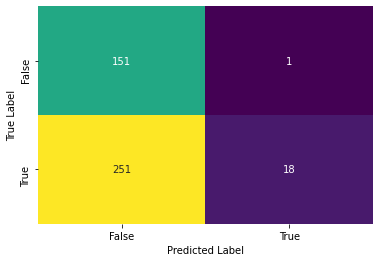

In [383]:
sn.heatmap(confusion_matrix_1, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [384]:
pred_threshold2 = (best_mod.predict_proba(test_X)[:,1] >= threshold2).astype(int)

In [385]:
confusion_matrix_2 = pd.DataFrame(m.confusion_matrix(test_y, pred_threshold2))

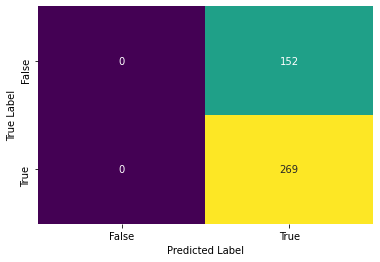

In [386]:
sn.heatmap(confusion_matrix_2, 
    annot=True, 
    fmt="d", 
    xticklabels =["False", "True"], 
    yticklabels = ["False", "True"], 
    cbar = False,
    cmap= "viridis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [387]:
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [388]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

variable        vi       std       low      high
0                  age  0.100238  0.004325  0.091587  0.108888
1               income  0.080602  0.004348  0.071905  0.089298
2                 educ  0.080602  0.006479  0.067644  0.093560
3     internet_use_bin  0.039747  0.001535  0.036676  0.042817
4      campaign_attend  0.039272  0.002273  0.034726  0.043817
5              protest  0.031037  0.002621  0.025795  0.036280
6                 male  0.027712  0.002402  0.022909  0.032515
7               orgmem  0.020586  0.001584  0.017419  0.023753
8         user_youtube  0.019952  0.001763  0.016426  0.023479
9              locvote  0.016785  0.002524  0.011738  0.021833
10             charity  0.015994  0.003222  0.009550  0.022438
11           housewife  0.015519  0.001847  0.011825  0.019212
12             selfemp  0.014410  0.001833  0.010744  0.018076
13          infs_radio  0.013777  0.001469  0.010840  0.016714
14               petit  0.013302  0.002206  0.008890  0.017713
15      socmed_use_bin  0.013302  0.003794  0.005714  0.020889
16  infs_face2face_tel  0.013143  0.001552  0.010040  0.016246
17               unemp  0.011876  0.001806  0.008265  0.015487
18       user_facebook  0.009184  0.001286  0.006612  0.011757
19     infs_television  0.009026  0.001978  0.005070  0.012982
20        neighb_mixed  0.009026  0.000950  0.007126  0.010926
21             married  0.008709  0.001325  0.006060  0.011359
22            employed  0.008551  0.001833  0.004885  0.012217
23         neighb_rich  0.006809  0.001469  0.003872  0.009746
24          in_capital  0.006492  0.001362  0.003768  0.009217
25    employed_pub_sec  0.006492  0.001615  0.003263  0.009722
26        user_twitter  0.006334  0.001416  0.003501  0.009167
27             student  0.005542  0.001661  0.002221  0.008864
28       user_whatsapp  0.005542  0.001120  0.003303  0.007782
29      user_instagram  0.005384  0.001362  0.002660  0.008108
30         neighb_poor  0.005384  0.001050  0.003283  0.007485
31      infs_newspaper  0.004117  0.000923  0.002270  0.005964
32         infs_socmed  0.003959  0.001939  0.000080  0.007838
33             retired  0.003642  0.000807  0.002027  0.005257
34   employed_priv_sec  0.002059  0.000388  0.001283  0.002834
35       user_telegram  0.001742  0.000317  0.001108  0.002375
36            internet  0.001108  0.000807 -0.000506  0.002723
37       user_snapchat -0.000158  0.000317 -0.000792  0.000475

In [389]:
vi_dat.to_csv("variable importance csv/sudan_y1")

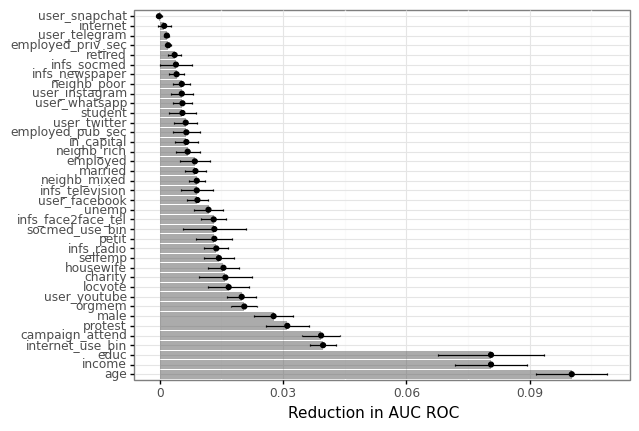

<ggplot: (8775695610116)>

In [390]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

## Logit Models

In [391]:
# train-test split
y = jordan.y_2_dem_pref_not_in_dem
X = jordan.drop(columns = ["y_2_dem_pref_not_in_dem", "y_1_distrust_gov"])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)

In [392]:
LogitR = Logit(class_weight = 'balanced')

In [393]:
clf = LogitR.fit(train_X, train_y)

In [394]:
pred_y= clf.predict(test_X)

In [395]:
m.roc_auc_score(test_y, pred_y)

0.5104879160966712

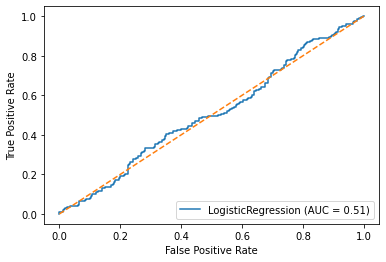

In [396]:
m.plot_roc_curve(LogitR, test_X, test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

In [397]:
# train-test split
y = jordan.y_1_distrust_gov
X = jordan.drop(columns = ["y_2_dem_pref_not_in_dem", "y_1_distrust_gov"])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)

In [398]:
clf = LogitR.fit(train_X, train_y)

In [399]:
pred_y= clf.predict(test_X)

In [400]:
m.roc_auc_score(test_y, pred_y)

0.5244430254008798

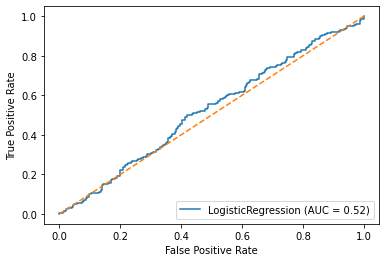

In [401]:
m.plot_roc_curve(LogitR, test_X, test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

In [402]:
# train-test split
y = kuwait.y_1_distrust_gov
X = kuwait.drop(columns = ["y_1_distrust_gov"])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)

In [403]:
clf = LogitR.fit(train_X, train_y)

In [404]:
pred_y= clf.predict(test_X)

In [405]:
m.roc_auc_score(test_y, pred_y)

0.5

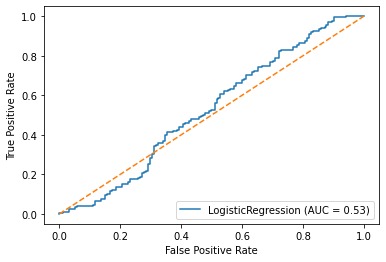

In [406]:
m.plot_roc_curve(LogitR, test_X, test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

In [407]:
# train-test split
y = morocco.y_2_dem_pref_not_in_dem
X = morocco.drop(columns = ["y_2_dem_pref_not_in_dem", "y_1_distrust_gov"])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)

In [408]:
clf = LogitR.fit(train_X, train_y)

In [409]:
pred_y= clf.predict(test_X)

In [410]:
m.roc_auc_score(test_y, pred_y)

0.6480500821018063

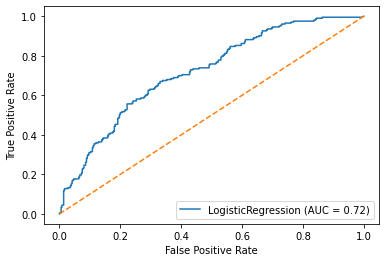

In [411]:
m.plot_roc_curve(LogitR, test_X, test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

In [412]:
# train-test split
y = morocco.y_1_distrust_gov
X = morocco.drop(columns = ["y_2_dem_pref_not_in_dem", "y_1_distrust_gov"])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)

In [413]:
clf = LogitR.fit(train_X, train_y)

In [414]:
pred_y= clf.predict(test_X)

In [415]:
m.roc_auc_score(test_y, pred_y)

0.6435345405767942

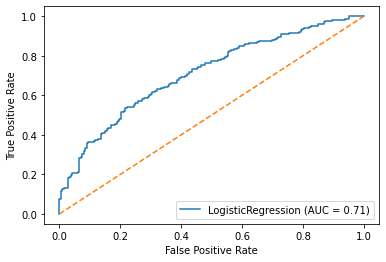

In [416]:
m.plot_roc_curve(LogitR, test_X, test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

In [417]:
# train-test split
y = egypt.y_2_dem_pref_not_in_dem
X = egypt.drop(columns = ["y_2_dem_pref_not_in_dem", "y_1_distrust_gov"])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)

In [418]:
clf = LogitR.fit(train_X, train_y)

In [419]:
pred_y= clf.predict(test_X)

In [420]:
m.roc_auc_score(test_y, pred_y)

0.6513877207737594

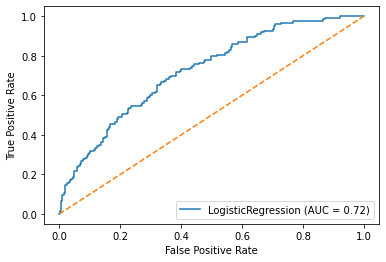

In [421]:
m.plot_roc_curve(LogitR, test_X, test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

In [422]:
# train-test split
y = egypt.y_1_distrust_gov
X = egypt.drop(columns = ["y_2_dem_pref_not_in_dem", "y_1_distrust_gov"])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)

In [423]:
clf = LogitR.fit(train_X, train_y)

In [424]:
pred_y= clf.predict(test_X)

In [425]:
m.roc_auc_score(test_y, pred_y)

0.6836228287841191

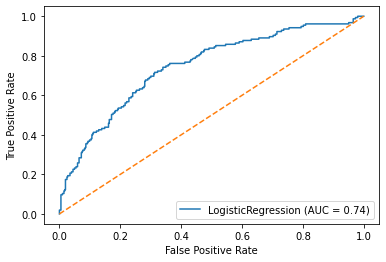

In [426]:
m.plot_roc_curve(LogitR, test_X, test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

In [427]:
# train-test split
y = algeria.y_2_dem_pref_not_in_dem
X = algeria.drop(columns = ["y_2_dem_pref_not_in_dem", "y_1_distrust_gov"])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)

In [428]:
clf = LogitR.fit(train_X, train_y)

In [429]:
pred_y= clf.predict(test_X)

In [430]:
m.roc_auc_score(test_y, pred_y)

0.5961066739928177

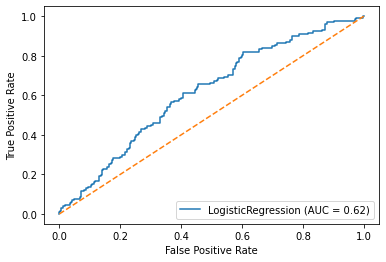

In [431]:
m.plot_roc_curve(LogitR, test_X, test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

In [432]:
# train-test split
y = sudan.y_1_distrust_gov
X = sudan.drop(columns = ["y_2_dem_pref_not_in_dem", "y_1_distrust_gov"])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)

In [433]:
clf = LogitR.fit(train_X, train_y)

In [434]:
pred_y= clf.predict(test_X)

In [435]:
m.roc_auc_score(test_y, pred_y)

0.5930224026609273

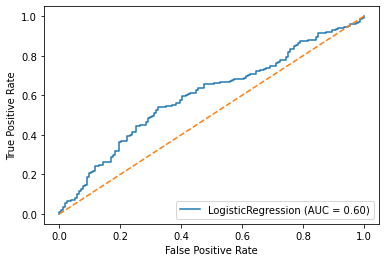

In [436]:
m.plot_roc_curve(LogitR, test_X, test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')

In [437]:
# train-test split
y = sudan.y_2_dem_pref_not_in_dem
X = sudan.drop(columns = ["y_2_dem_pref_not_in_dem", "y_1_distrust_gov"])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)

In [438]:
clf = LogitR.fit(train_X, train_y)

In [439]:
pred_y= clf.predict(test_X)

In [440]:
m.roc_auc_score(test_y, pred_y)

0.5817490037927889

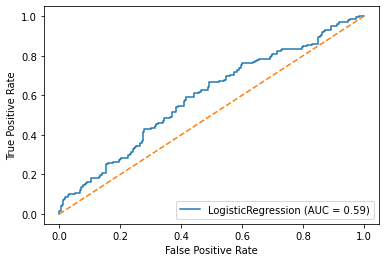

In [441]:
m.plot_roc_curve(LogitR, test_X, test_y)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')